In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score , classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


from imblearn.under_sampling import RandomUnderSampler




- Choose any imbalanced dataset # DONE

- Apply any needed preprocessing # DONE

- Apply Resampling on this dataset (both undersampling then oversampling ) # DONE 

- Choose Two Ensemble models ( one Bagging and one boosting )

- Train each model on the processed data 

- Calculate Accuracy, Precision, Recall, f1-score and AUC for each model

- Optimize the two models by choose different parameters to get better results 

- Calculate Accuracy, Precision, Recall, f1-score and AUC for each model for the optimized models

- Submit The Code (.py or .ipynb)

- Work on Groups (Only Two or three is allowed for each group, don't work alone)

- Their will be a discussion for your code

## Reading and inspection the data

In [2]:

df = pd.read_csv("dataset.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [3]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [4]:
#checking for misinput vales
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for column in categorical_columns:
    print(f"{column}: {df[column].unique()}")


gender: ['Male' 'Female' 'Other']
ever_married: ['No' 'Yes']
work_type: ['children' 'Private' 'Never_worked' 'Self-employed' 'Govt_job']
Residence_type: ['Rural' 'Urban']
smoking_status: [nan 'never smoked' 'formerly smoked' 'smokes']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [7]:
# Summary statistics for all columns including non-numerical
df.describe(include='all')


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,43400.000000,43400,43400.000000,43400.000000,43400.000000,43400,43400,43400,43400.000000,41938.000000,30108,43400.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,3,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,25665,NaN,NaN,NaN,27938,24834,21756,NaN,NaN,16053,NaN
mean,36326.142350,NaN,42.217894,0.093571,0.047512,NaN,NaN,NaN,104.482750,28.605038,NaN,0.018041
std,21072.134879,NaN,22.519649,0.291235,0.212733,NaN,NaN,NaN,43.111751,7.770020,NaN,0.133103
min,1.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.000000,10.100000,NaN,0.000000
25%,18038.500000,NaN,24.000000,0.000000,0.000000,NaN,NaN,NaN,77.540000,23.200000,NaN,0.000000
50%,36351.500000,NaN,44.000000,0.000000,0.000000,NaN,NaN,NaN,91.580000,27.700000,NaN,0.000000
75%,54514.250000,NaN,60.000000,0.000000,0.000000,NaN,NaN,NaN,112.070000,32.900000,NaN,0.000000


In [8]:
df.isnull().sum().sum()


14754

In [9]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [10]:
filtered_df = df[pd.isna(df["bmi"]) & pd.isna(df["smoking_status"]) & (df["stroke"] == 1)]
filtered_df.count()

id                   50
gender               50
age                  50
hypertension         50
heart_disease        50
ever_married         50
work_type            50
Residence_type       50
avg_glucose_level    50
bmi                   0
smoking_status        0
stroke               50
dtype: int64

In [11]:
df["stroke"].value_counts()

stroke
0    42617
1      783
Name: count, dtype: int64

### I want to see if there is realtion between bmi , smoking with stroke 

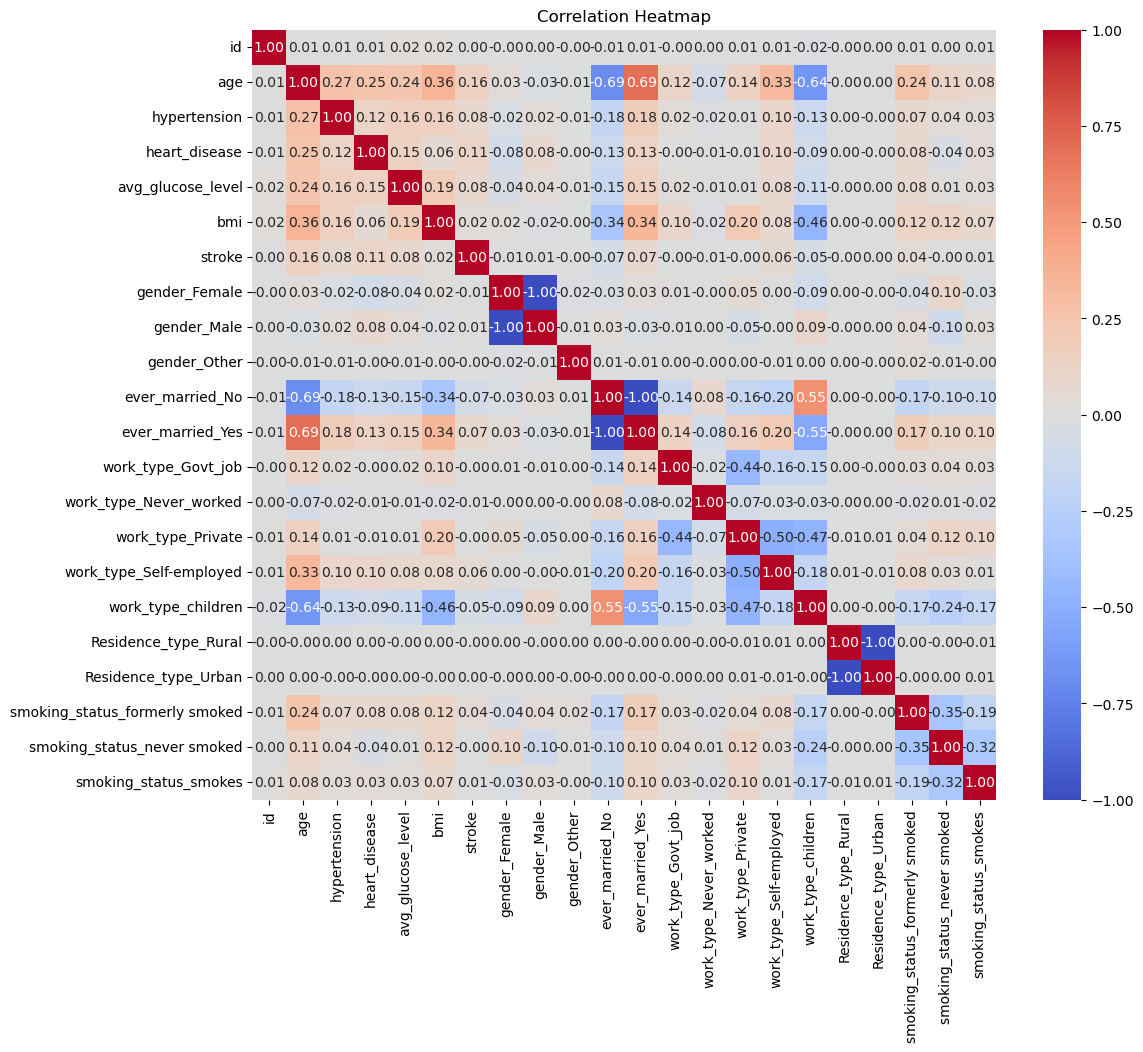

In [12]:
df_encoded = pd.get_dummies(df)

# Compute correlation matrix\
correlation_matrix = df_encoded.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# Data Preprocessing 

There are multiple ways we can use to deal with an values , we can either fill them with the mode , or create a models that will predict the null values(KNN , random forest ,...) , we will try multiple ones and see who give us better accuracy


# Handling BMI 

In [13]:
# Econding none ordinal category columns , hence we will use OneHotEncoder 

df = pd.get_dummies(df,columns=['gender','ever_married','work_type','Residence_type','smoking_status'])

In [14]:
#knn 
knn =  KNNImputer(missing_values=np.nan)
data = knn.fit_transform(df)
knn_data = pd.DataFrame(data , columns=df.columns)

In [15]:
# or Interpolation , how to know which one is better ? 
interpolate_data = df.copy()
interpolate_data['bmi'] = interpolate_data['bmi'].interpolate(method='linear', limit_direction='both')


In [16]:
#check the shape after encoding 
df.shape

(43400, 22)

In [17]:
# check possible featuer extraction 

# Model 

In [18]:
knn_data.max()

id                                72943.00
age                                  82.00
hypertension                          1.00
heart_disease                         1.00
avg_glucose_level                   291.05
bmi                                  97.60
stroke                                1.00
gender_Female                         1.00
gender_Male                           1.00
gender_Other                          1.00
ever_married_No                       1.00
ever_married_Yes                      1.00
work_type_Govt_job                    1.00
work_type_Never_worked                1.00
work_type_Private                     1.00
work_type_Self-employed               1.00
work_type_children                    1.00
Residence_type_Rural                  1.00
Residence_type_Urban                  1.00
smoking_status_formerly smoked        1.00
smoking_status_never smoked           1.00
smoking_status_smokes                 1.00
dtype: float64

In [19]:
# we will try the knn data first 
knn_data= knn_data .drop(columns=["id"])
knn_data.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [20]:
X = knn_data.drop('stroke',axis=1)
y = knn_data['stroke']


In [21]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3, random_state=42)

# resourse for stacking classifier :https://www.kaggle.com/code/marcinrutecki/stacking-classifier-ensemble-for-great-results#5.1-Level-0-with-28-Models

In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
#from sklearn.ensemble import VotingClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [23]:
estimators = []
estimators.append(('AdaBoostClassifier', AdaBoostClassifier(random_state=13) ))
estimators.append(('Bagging Classifier', BaggingClassifier(random_state=13) ))
estimators.append(('Decision Tree Classifier', DecisionTreeClassifier(random_state=13) ))
estimators.append(('Dummy Classifier', DummyClassifier(random_state=13) ))
estimators.append(('Gaussian NB', GaussianNB() ))
estimators.append(('Gradient Boosting Classifier', GradientBoostingClassifier(random_state=13) ))
estimators.append(('KNN', KNeighborsClassifier() ))
estimators.append(('LogisticRegression', LogisticRegression(max_iter=1000, random_state=13)))
estimators.append(('MLPClassifier', MLPClassifier(max_iter=2000,random_state=13) ))
estimators.append(('Nearest Centroid', NearestCentroid() ))
estimators.append(('Passive Aggressive Classifier', PassiveAggressiveClassifier(random_state=13) ))
estimators.append(('RandomForest', RandomForestClassifier(max_depth= 10, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 170, random_state=13) ))
estimators.append(('XGB', XGBClassifier(random_state=13) ))
estimators.append(('CatBoost', CatBoostClassifier(logging_level='Silent', random_state=13) ))



XGB = XGBClassifier(random_state=13)

In [24]:
SC = StackingClassifier(estimators=estimators,final_estimator=XGB,cv=6)
SC.fit(X_train, y_train)
y_pred = SC.predict(X_test)

for name, model in estimators:
    model.fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    print(f"{name} training Accuracy: {train_accuracy:.2f}")
    print(f"{name} test Accuracy: {test_accuracy:.2f}\n")

print(f"\nStacking classifier training Accuracy: {SC.score(X_train, y_train):0.2f}")
print(f"Stacking classifier test Accuracy: {SC.score(X_test, y_test):0.2f}")


AdaBoostClassifier training Accuracy: 0.98
AdaBoostClassifier test Accuracy: 0.98

Bagging Classifier training Accuracy: 1.00
Bagging Classifier test Accuracy: 0.98

Decision Tree Classifier training Accuracy: 1.00
Decision Tree Classifier test Accuracy: 0.96

Dummy Classifier training Accuracy: 0.98
Dummy Classifier test Accuracy: 0.98

Gaussian NB training Accuracy: 0.17
Gaussian NB test Accuracy: 0.16

Gradient Boosting Classifier training Accuracy: 0.98
Gradient Boosting Classifier test Accuracy: 0.98

KNN training Accuracy: 0.98
KNN test Accuracy: 0.98

LogisticRegression training Accuracy: 0.98
LogisticRegression test Accuracy: 0.98

MLPClassifier training Accuracy: 0.98
MLPClassifier test Accuracy: 0.98

Nearest Centroid training Accuracy: 0.59
Nearest Centroid test Accuracy: 0.59

Passive Aggressive Classifier training Accuracy: 0.98
Passive Aggressive Classifier test Accuracy: 0.98

RandomForest training Accuracy: 0.98
RandomForest test Accuracy: 0.98

XGB training Accuracy: 0

In [89]:
"""under= RandomUnderSampler(random_state=1)
X_under, y_under = under.fit_resample(X,y)

X_train,X_test,y_train,y_test = train_test_split(X_under,y_under,test_size=0.3,random_state=1)
for name, model in estimators:
    print(f"MODEL NAME: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("\n" + "="*60 + "\n") """

'\nX_train,X_test,y_train,y_test = train_test_split(X_under,y_under,test_size=0.3,random_state=1)\nfor name, model in estimators:\n    print(f"MODEL NAME: {name}")\n    model.fit(X_train, y_train)\n    y_pred = model.predict(X_test)\n    print(classification_report(y_test, y_pred))\n    print("\n" + "="*60 + "\n") '

In [25]:
knn_data.shape

(43400, 21)

In [95]:
# i will do it manual :
class0 , class1 = df.stroke.value_counts()
df_class0=df[df["stroke"]==0]
df_class1=df[df["stroke"]==1]

In [100]:
df_class0.shape

(42617, 22)

In [101]:
df_class1.shape

(783, 22)

In [104]:
df_class0.sample(class1).shape

(783, 22)

In [109]:
df_class_0_under = df_class0.sample(class1)

In [106]:

from imblearn.over_sampling import SMOTE

over = SMOTE(random_state=1)
X_over, y_over = over.fit_resample(X,y)
"""
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,test_size=0.3,random_state=1)
print("OverSampling (SMOTE):")
for name, model in estimators:
    print(f"MODEL NAME: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("\n" + "="*60 + "\n") 
    
    print(classification_report(y_test,y_pred))"""

'\nX_train,X_test,y_train,y_test = train_test_split(X_over,y_over,test_size=0.3,random_state=1)\nprint("OverSampling (SMOTE):")\nfor name, model in estimators:\n    print(f"MODEL NAME: {name}")\n    model.fit(X_train, y_train)\n    y_pred = model.predict(X_test)\n    print(classification_report(y_test, y_pred))\n    print("\n" + "="*60 + "\n") \n    \n    print(classification_report(y_test,y_pred))'

In [92]:
X_over.shape

(85234, 20)

In [ ]:
from imblearn.combine import SMOTEENN

sample = SMOTEENN()
X_over,y_over = sample.fit_resample(X,y)

X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,test_size=0.3,random_state=1)

In [ ]:
for name, model in estimators:
    print(f"MODEL NAME: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("\n" + "="*60 + "\n") 
    
    print(classification_report(y_test,y_pred))

# KNN 

# Smoking 

## Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Instantiate imputer for smoking_status
rfSmoke = RandomForestClassifier()
rfSmoke.fit(X_train, y_train)

y_pred_rf = rfSmoke.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)


In [ ]:
#let try knn 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy_knn)



In [ ]:
# Create an imputer object
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer on training data and transform both training and testing data
X_train_smoking_imputed = imputer.fit_transform(X_train)
X_test_smoking_imputed = imputer.transform(X_test)

# Instantiate your classifier
clf = RandomForestClassifier()  # Instantiate with appropriate hyperparameters

# Now you can train your model using X_train_smoking_imputed and y_train_smoking
clf.fit(X_train_smoking_imputed, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_smoking_imputed)

# Calculate accuracy
accuracy_imp = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_imp)